# Build a song recommender system

In [1]:
import turicreate as tc
from matplotlib import pyplot as plt

# Load some music data

In [2]:
song_data = tc.SFrame('song_data.sframe/')

# Explore our data

In [3]:
song_data.head(5)

Columns:
	user_id	str
	song_id	str
	listen_count	int
	title	str
	artist	str
	song	str

Rows: 5

Data:
+-------------------------------+--------------------+--------------+
|            user_id            |      song_id       | listen_count |
+-------------------------------+--------------------+--------------+
| b80344d063b5ccb3212f76538f... | SOAKIMP12A8C130995 |      1       |
| b80344d063b5ccb3212f76538f... | SOBBMDR12A8C13253B |      2       |
| b80344d063b5ccb3212f76538f... | SOBXHDL12A81C204C0 |      1       |
| b80344d063b5ccb3212f76538f... | SOBYHAJ12A6701BF1D |      1       |
| b80344d063b5ccb3212f76538f... | SODACBL12A8C13C273 |      1       |
+-------------------------------+--------------------+--------------+
+-----------------+---------------+-------------------------------+
|      title      |     artist    |              song             |
+-----------------+---------------+-------------------------------+
|     The Cove    |  Jack Johnson |    The Cove - Jack Johnson    |
| Entre Dos Aguas | Paco De Lucia | Entre Dos Aguas - Paco De ... |
|     Stronger    |   Kanye West  |     Stronger - Kanye West     |
|  Constellations |  Jack Johnson | Constellations - Jack Johnson |
|   Learn To Fly  |  Foo Fighters |  Learn To Fly - Foo Fighters  |
+-----------------+---------------+-------------------------------+
[5 rows x 6 columns]

## Show the most popular songs in the dataset

In [4]:
song_data['song'].show()

Materializing SArray

# Count the number of unique users in the data

In [5]:
users = song_data['user_id'].unique()

In [6]:
len(users)

66346

# Create a song recommender

In [7]:
train_data,test_data = song_data.random_split(.8,seed=0)

## Create a very simple popularity recommender

In [8]:
popularity_model = tc.popularity_recommender.create(train_data,
                                                    user_id = 'user_id',
                                                    item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 0.443316s

893580 observations to process; with 9952 unique items.

## Use the popularity model to make some predictions

In [9]:
popularity_model.recommend(users=[users[0]]).head(5)

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sehr kosmisch - Harmonia,4754.0,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Undo - Björk,4227.0,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,You're The One - DwightYoakam ...,3781.0,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Revelry - Kings Of Leon,3527.0,5


In [10]:
popularity_model.recommend(users=[users[1]]).head(5)

user_id,song,score,rank
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Sehr kosmisch - Harmonia,4754.0,1
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Undo - Björk,4227.0,2
c067c22072a17d33310d7223d7b79f819e48cf42 ...,You're The One - DwightYoakam ...,3781.0,3
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Revelry - Kings Of Leon,3527.0,5


# Build a recommender with personalization

In [11]:
personalized_model = tc.item_similarity_recommender.create(train_data,
                                                           user_id = 'user_id',
                                                           item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 0.450325s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.409ms                        | 1.5        |

| 18.199ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 136.017ms                           | 0                | 0               |

| 484.138ms                           | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.51225s

## Apply personalized model to make song recommendations

In [12]:
personalized_model.recommend(users=[users[0]]).head(5)

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Riot In Cell Block NumberNine - Dr Feelgood ...,0.03749999403953552,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sei Lá Mangueira -Elizeth Cardoso ...,0.03316326439380646,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,The Stallion - Ween,0.032258063554763794,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Rain - Subhumans,0.031415924429893494,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,West One (Shine On Me) -The Ruts ...,0.030677199363708496,5


In [13]:
personalized_model.recommend(users=[users[1]]).head(5)

user_id,song,score,rank
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Grind With Me (ExplicitVersion) - Pretty Ricky ...,0.04594243764877319,1
c067c22072a17d33310d7223d7b79f819e48cf42 ...,There Goes My Baby -Usher ...,0.03319207429885864,2
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Panty Droppa [Intro](Album Version) - Trey ...,0.03185662031173706,3
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Nobody (Featuring AthenaCage) (LP Version) - ...,0.027846765518188477,4
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Youth Against Fascism -Sonic Youth ...,0.026291418075561523,5


# Apply model to find similar songs in the data set

In [14]:
personalized_model.get_similar_items(['With Or Without You - U2']).head(5)

song,similar,score,rank
With Or Without You - U2,I Still Haven't FoundWhat I'm Looking For ...,0.04285717010498047,1
With Or Without You - U2,Hold Me_ Thrill Me_ KissMe_ Kill Me - U2 ...,0.033734917640686035,2
With Or Without You - U2,Window In The Skies - U2,0.03283584117889404,3
With Or Without You - U2,Vertigo - U2,0.03007519245147705,4
With Or Without You - U2,Sunday Bloody Sunday - U2,0.02713179588317871,5


In [15]:
personalized_model.get_similar_items(['Chan Chan (Live) - Buena Vista Social Club']).head(5)

song,similar,score,rank
Chan Chan (Live) - BuenaVista Social Club ...,Murmullo - Buena VistaSocial Club ...,0.1881188154220581,1
Chan Chan (Live) - BuenaVista Social Club ...,La Bayamesa - Buena VistaSocial Club ...,0.1871921420097351,2
Chan Chan (Live) - BuenaVista Social Club ...,Amor de Loca Juventud -Buena Vista Social Club ...,0.18483412265777588,3
Chan Chan (Live) - BuenaVista Social Club ...,Diferente - Gotan Project,0.021459221839904785,4
Chan Chan (Live) - BuenaVista Social Club ...,Mistica - Orishas,0.020576119422912598,5


# Compare the models quantitatively
We now formally compare the popularity and the personalized models using precision-recall curves. 

In [16]:
model_performance = tc.recommender.util.compare_models(test_data,
                                                       [popularity_model, personalized_model],
                                                       user_sample=.05)

compare_models: using 2931 users to estimate model performance
PROGRESS: Evaluate model M0


recommendations finished on 1000/2931 queries. users per second: 33458.2

recommendations finished on 2000/2931 queries. users per second: 34597.3


Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.023882633913340168 | 0.006113506267037477 |
|   2    | 0.020641419310815444 | 0.01131885443403295  |
|   3    | 0.01956101444330719  | 0.01571371087597231  |
|   4    | 0.019020812009553044 | 0.020056069491616486 |
|   5    | 0.01746844080518597  | 0.023120645507604416 |
|   6    | 0.016660980325258742 | 0.027164889674673544 |
|   7    | 0.016035482770385554 |  0.029984933461964   |
|   8    | 0.015609007164790148 | 0.033884717479455255 |
|   9    | 0.014822396603358753 | 0.036134096289734866 |
|   10   | 0.014261344251108858 | 0.03888220302965322  |
+--------+----------------------+----------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/2931 queries. users per second: 28639.3

recommendations finished on 2000/2931 queries. users per second: 30372.5


Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.027635619242579325 | 0.008265528019878069 |
|   2    | 0.023712043671102013 | 0.013667285366364185 |
|   3    | 0.021835551006482438 |  0.0180077362267741  |
|   4    | 0.019617877857386546 | 0.021075000476228727 |
|   5    | 0.017809621289662233 | 0.02329583680658402  |
|   6    | 0.016319799840782436 | 0.02574774537415275  |
|   7    | 0.015255641663011176 | 0.028519972199603724 |
|   8    | 0.014244285226885022 | 0.03019866141667574  |
|   9    | 0.013495583608173168 | 0.032249412136822565 |
|   10   | 0.012862504264756077 | 0.033908199158966826 |
+--------+----------------------+----------------------+
[10 rows x 3 columns]



The table shows that the personalized model provides much better performance.

In [17]:
model_performance_popularity = model_performance[0]['precision_recall_overall']
model_performance_personalized = model_performance[1]['precision_recall_overall']

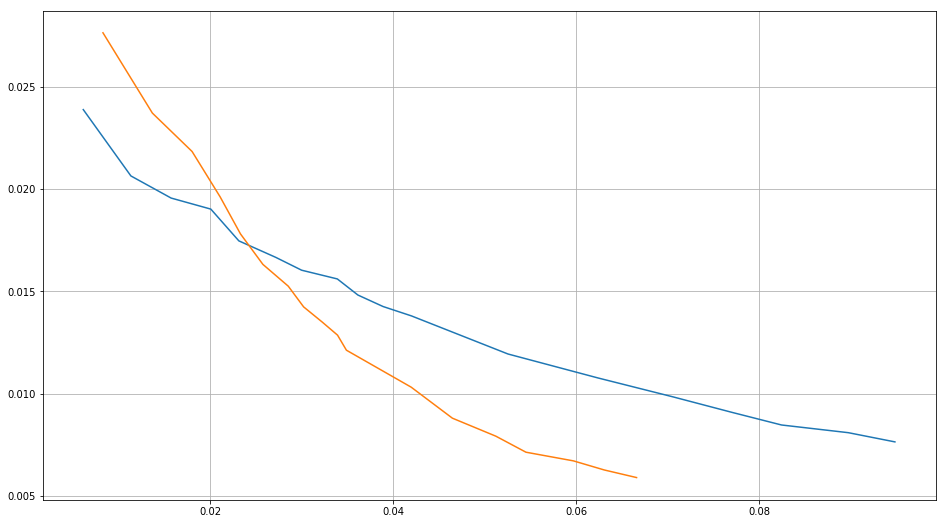

In [18]:
plt.figure(figsize=(16,9))
plt.plot(model_performance_popularity['recall'], model_performance_popularity['precision'])
plt.plot(model_performance_personalized['recall'], model_performance_personalized['precision'])
plt.grid(True)